<a href="https://colab.research.google.com/github/kykytsapol/-YouTube-/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BE_%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D0%B0_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pandas
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import nmf
from gensim import models

In [ ]:
# открываем экселевский файл. достаем из него столбцы с оригинальным текстом комментов и преобработтанами
comments = pandas.read_excel('комменты_предобработка_доковида1.xlsx', usecols = 'G, T')
comments

,snippet.textOriginal,Текста_на_предобработку
0,Эксперты раскрывают многие магические секреты....,эксперт раскрывать многий магический секрет хо...
1,гаданием на картах таро увлеклась моя знакомая...,гадание карта таро увлекаться знакомый дом при...
2,Любовь надо искать на своей улице....мораль се...,любовь искать свой улица мораль сей басня худо...
3,"Деньги это не главное , главное Любовь на всю...",деньги главный главное любовь
4,моя бабушка любит мистические истории,бабушка любить мистический история
...,...,...
30400,Хочется узнать есть ли у меня порча или нет.,хотеться узнавать порча
30401,Rima Versuliene . А я не видела себя. Значит в...,Rima Versuliene видеть ерунда
30402,О ком вы хотели сказать.Мне на самом деле очен...,самый дело плохо
30403,"Аня ты умничка, весь расклад совпадает",аня умничек расклад совпадать


In [ ]:
#оставляем только русские слова 
import re

comments["Текста_на_предобработку"] = comments['Текста_на_предобработку'].apply(lambda x: str(x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"[^а-яА-ЯёЁ\s]", "", x))
comments["Текста_на_предобработку"]

0        эксперт раскрывать многий магический секрет хо...
1        гадание карта таро увлекаться знакомый дом при...
2        любовь искать свой улица мораль сей басня худо...
3                            деньги главный главное любовь
4                       бабушка любить мистический история
                               ...                        
30400                              хотеться узнавать порча
30401                                        видеть ерунда
30402                                     самый дело плохо
30403                        аня умничек расклад совпадать
30404                                           телец дева
Name: Текста_на_предобработку, Length: 30405, dtype: object

In [ ]:
# Создаем датафрейм с предобработанным текстом 
data = pandas.DataFrame()
data.loc[:, "Текст_на_векторизацию"] = comments['Текста_на_предобработку']
data = data.dropna() # удаляем пропуски - уже можно 
data

,Текст_на_векторизацию
0,эксперт раскрывать многий магический секрет хороший плохой страшно плохой применять практика зло...
1,гадание карта таро увлекаться знакомый дом приходить погадать бросать затея рушиться постоянно р...
2,любовь искать улица мораль сей басня худо добро
3,деньги главный главное любовь
4,бабушка любить мистический история
...,...
30400,хотеться узнавать порча
30401,видеть ерунда
30402,самый дело плохо
30403,умничек расклад совпадать


In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2, и словарь делаю не больше 10000 токенов
cvect = CountVectorizer(min_df=2, max_features=10000).fit(data["Текст_на_векторизацию"])
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
cmatrix = cvect.transform(data["Текст_на_векторизацию"])
# объект cmatrix оформляем как датафрейм
cmatrix_df = pandas.DataFrame(cmatrix.toarray(), columns = cvect.get_feature_names(), index=data.index)
cmatrix_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,аа,ааа,аааа,ааааа,абдулджалиев,абдуллаев,аблязов,або,аборт,абрамов,...,яснознание,ясность,ясный,ясон,ястный,яхта,яценко,яша,яшагин,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#частотность токенов
cmatrix_df[:].sum().sort_values()

обычай            2
корм              2
коричневый        2
парадокс          2
параметр          2
               ... 
расклад        2735
колода         2881
благодарить    3185
таро           3208
карта          4638
Length: 10000, dtype: int64

In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2
tfidf = TfidfVectorizer(min_df=2, max_features=10000).fit(data["Текст_на_векторизацию"])
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
tfidfmatrix = tfidf.transform(data["Текст_на_векторизацию"])
# объект cmatrix оформляем как датафрейм
tfidfmatrix_df = pandas.DataFrame(tfidfmatrix.toarray(), columns = tfidf.get_feature_names(), index=data.index)
tfidfmatrix_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,аа,ааа,аааа,ааааа,абдулджалиев,абдуллаев,аблязов,або,аборт,абрамов,...,яснознание,ясность,ясный,ясон,ястный,яхта,яценко,яша,яшагин,ящик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#частотность токенов
tfidfmatrix_df[:].sum().sort_values()

древность         0.152244
шутник            0.182833
калка             0.206912
блюсти            0.214325
учреждение        0.214695
                  ...     
большой         493.575534
таро            542.209261
расклад         614.801378
карта           676.333750
благодарить    1195.819666
Length: 10000, dtype: float64

In [ ]:
# Концертируем в лист
data = comments['Текста_на_предобработку'].values.tolist()

In [ ]:
# Преобразование документа в список токенов 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence))) 
data_words = list(sent_to_words(data))

In [ ]:
# Создаем словарь
id2word = corpora.Dictionary(data_words)

In [ ]:
# Создаем корпус
texts = data_words

In [ ]:
# Частота встречаемости 
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Смотрим 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


### Модель LSA

In [ ]:
from gensim.models import LsiModel
# модель LSA
lsa_model = gensim.models.LsiModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10)

In [ ]:
# согласованность LSA модели методом c_v
cm = CoherenceModel(model=lsa_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v')
coherence = cm.get_coherence()
coherence

0.5198710714902836

In [ ]:
# согласованность LSA модели методос u_mass
cm = CoherenceModel(model=lsa_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.785225388654861

In [ ]:
# это функция, которая позволяет построить моедли с разным количеством топиков, посчитать и сохранить значение согласованности для моделей.
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LsiModel(corpus=corpus, num_topics=num_topics,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
# задаем значения наши
model_list, coherence_values = compute_coherence_values(dictionary=id2word,corpus=corpus,
                                                      texts=texts, start=2, limit=50, step=5)

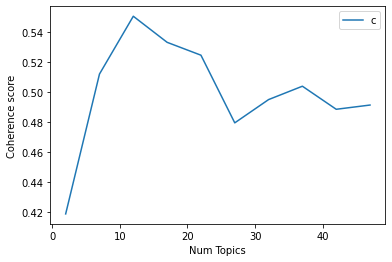

In [ ]:
# Сторим график, который показывает как изменяется значение согласованности при добавлении топика в модель.
limit=50; start=2; step=5;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Итак, как видно из рисунка выше модель LSA с 12 топиками имеет наивысшее значение согласованности. Построим данную модель,определим ее точное значение согласованности и посмотрим на получившиеся топики. 

In [ ]:
from gensim.models import LsiModel
# модель LSA
lsa_model = gensim.models.LsiModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12)

In [ ]:
lsa_model.print_topics()

[(0,
  '0.665*"карта" + 0.353*"таро" + 0.347*"колода" + 0.202*"расклад" + 0.138*"вопрос" + 0.114*"видео" + 0.102*"понимать" + 0.092*"значение" + 0.089*"благодарить" + 0.086*"говорить"'),
 (1,
  '0.721*"колода" + -0.524*"карта" + 0.359*"таро" + -0.162*"расклад" + -0.066*"вопрос" + 0.056*"обзор" + -0.050*"выпадать" + 0.048*"работать" + 0.038*"купить" + 0.038*"книга"'),
 (2,
  '0.549*"расклад" + 0.447*"благодарить" + -0.439*"карта" + -0.159*"колода" + 0.128*"отношение" + 0.110*"знать" + 0.104*"мужчина" + 0.102*"делать" + 0.097*"вариант" + 0.094*"понимать"'),
 (3,
  '0.790*"таро" + -0.534*"колода" + -0.154*"расклад" + -0.115*"карта" + 0.090*"обучение" + 0.070*"психология" + 0.068*"архетип" + -0.056*"благодарить" + 0.036*"книга" + 0.036*"мир"'),
 (4,
  '-0.847*"благодарить" + 0.207*"расклад" + -0.175*"карта" + 0.154*"вопрос" + 0.119*"говорить" + 0.109*"знать" + 0.102*"понимать" + 0.096*"делать" + 0.090*"отношение" + 0.073*"бог"'),
 (5,
  '-0.701*"расклад" + -0.215*"таро" + 0.181*"бог" + 0.1

In [ ]:
# согласованность LSA модели методом c_v
cm = CoherenceModel(model=lsa_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v')
coherence = cm.get_coherence()
coherence

0.5403053437339665

In [ ]:
# согласованность LSA модели методос u_mass
cm = CoherenceModel(model=lsa_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.58937061451134

Для модели LSA с 12 топиками согласованность, рассчитанная методом, c_v примерно равна 0,54, а методом u_mass - 3,59. Отрицательный знак появляется потому, метод u_mass использует логарифм для расчета согласованности. Кроме того, мы видим, что некоторые веса слов, которые отражают их значимость для темы, имеют отрицательный знак. Это означает, что данные слова совсем не свойственны даной теме. При большом объеме словаря, факт того, что слово совсем не свойственно данной усложняет интерпретацию - нам важно понять из каких слов состоит тема. В связи с этим, ряд авторов отмечает, что это является существенным недостатком модели LSA, который был устранен в более поздних моделях.

### Модель LDA

In [ ]:
# Строим LDA модель 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10) 

In [ ]:
# Перплексия (чем меньше значене тем лучше)
lda_model.log_perplexity(corpus)

-8.839248033226596

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=lda_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.3988947409678307

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=lda_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-5.031380887130824

In [ ]:
# подбираем оптимальное значение топиков
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
# задаем значения наши
model_list, coherence_values = compute_coherence_values(dictionary=id2word,corpus=corpus,
                                                      texts=texts, start=2, limit=50, step=5)

In [ ]:
# Сторим график, который показывает как изменяется значение согласованности при добавлении топика в модель.
limit=50; start=2; step=5;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Наивысшее значение согласованности наблюдается для модели с 3 топиками

In [ ]:
# Строим LDA модель 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3) 

In [ ]:
# Перплексия (чем меньше значене тем лучше)
lda_model.log_perplexity(corpus)

-8.393767828503696

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=lda_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.49141766580766744

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=lda_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.1813955299368004

In [ ]:
lda_model.print_topics()

[(0,
  '0.039*"благодарить" + 0.019*"расклад" + 0.014*"большой" + 0.014*"огромный" + 0.013*"видео" + 0.010*"удача" + 0.008*"канал" + 0.008*"ждать" + 0.008*"комментарий" + 0.007*"счастие"'),
 (1,
  '0.028*"карта" + 0.026*"таро" + 0.020*"колода" + 0.011*"вопрос" + 0.006*"расклад" + 0.005*"работать" + 0.005*"ответ" + 0.004*"самый" + 0.004*"аркан" + 0.004*"система"'),
 (2,
  '0.009*"знать" + 0.007*"говорить" + 0.007*"жить" + 0.006*"давать" + 0.006*"делать" + 0.006*"бог" + 0.006*"становиться" + 0.006*"понимать" + 0.005*"думать" + 0.005*"отношение"')]

Для модели LDA с 3 топиками согласованность, рассчитанная методом, c_v примерно равна 0,43, а методом u_mass - 4,36. Перплексия равна -8,97. Несмотря на то, что значения согласованности у модели LSA ненмого выше, она проигрывает модели LDA с точки зрения интерпретации. Для нас самое важное - это логчиность и удобство интерпретации получившихся топиков. 

### Модель NMF

In [ ]:
nmf_model = gensim.models.nmf.Nmf(corpus,id2word=id2word, num_topics=10)

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=nmf_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.5499629525989697

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=nmf_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.332430357101444

In [ ]:
# это функция, которая позволяет построить моедли с разным количеством топиков, посчитать и сохранить значение согласованности для моделей.
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.nmf.Nmf(corpus=corpus, num_topics=num_topics,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
# задаем значения наши
model_list, coherence_values = compute_coherence_values(dictionary=id2word,corpus=corpus,
                                                      texts=texts, start=2, limit=50, step=5)

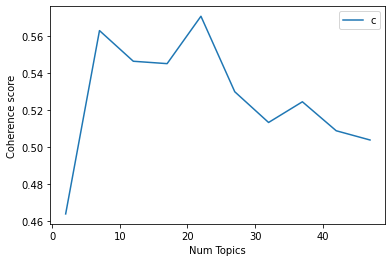

In [ ]:
# Сторим график, который показывает как изменяется значение согласованности при добавлении топика в модель.
limit=50; start=2; step=5;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Число топиков")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

Максимальное значение согласованности достигается с включением 22 топиков.

In [ ]:
nmf_model = gensim.models.nmf.Nmf(corpus,id2word=id2word, num_topics=12)

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=nmf_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.583067719155984

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=nmf_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.2447057054977657

In [ ]:
nmf_model.print_topics()

[(0,
  '0.053*"вопрос" + 0.046*"карта" + 0.029*"выпадать" + 0.027*"аркан" + 0.024*"король" + 0.024*"кубок" + 0.017*"здравствовать" + 0.014*"мужчина" + 0.013*"ответ" + 0.013*"пентакль"'),
 (1,
  '0.031*"понимать" + 0.030*"говорить" + 0.022*"вопрос" + 0.010*"гадать" + 0.009*"знать" + 0.008*"бог" + 0.008*"давать" + 0.008*"делать" + 0.007*"вообще" + 0.006*"ответ"'),
 (2,
  '0.042*"меч" + 0.022*"большой" + 0.015*"жезл" + 0.013*"перевертывать" + 0.012*"пентакль" + 0.010*"огонь" + 0.008*"ждать" + 0.008*"воздух" + 0.008*"мир" + 0.007*"становиться"'),
 (3,
  '0.031*"смотреть" + 0.027*"работа" + 0.019*"самый" + 0.018*"хороший" + 0.010*"думать" + 0.008*"становиться" + 0.008*"находить" + 0.005*"дело" + 0.005*"вариант" + 0.005*"деньги"'),
 (4,
  '0.126*"видео" + 0.021*"канал" + 0.020*"большой" + 0.017*"посмотреть" + 0.014*"интересный" + 0.011*"огромный" + 0.008*"новый" + 0.008*"тема" + 0.007*"ждать" + 0.007*"знать"'),
 (5,
  '0.145*"таро" + 0.018*"обучение" + 0.017*"здравствовать" + 0.013*"психолог

Для модели NMF с 22 топиками согласованность, рассчитанная методом, c_v примерно равна 0,58, а методом u_mass - 3,24.

Далее необхомо выбрать между моделью LDA и NMF. Несмотря на то, что у модели NMF согласованность немного выше, чем у модели LDA, в качестве лучшей моделя я выбираю LDA. Это связано с тем, что получвшиеся топики с использованием модели LDA получились более логичными с точки зрения интерпретации. 